# BIM Project: Nitroreductase

**Arthur VINCENS & Sofia TERKI**

## Import libraries

In [2]:
%pip install Bio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.0/281.0 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.7 MB/s eta 0:00:00


In [3]:
# Import libraries
from Bio import SeqIO
import random
import numpy as np
import matplotlib as plt
# Enable inline plotting and import necessary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
# Set plot style for a cleaner visual appearance
#plt.style.use('seaborn')

In [4]:
import requests
#from StringIO import StringIO  # Python 2
from io import StringIO  # Python 3

GO_term = "A0R2V4"

def auto_seq_retrival (UniProtKB_accession):
  url = f"https://rest.uniprot.org/uniprotkb/search?query={UniProtKB_accession}&format=fasta"

  # Requête à l'API UniProt
  response = requests.get(url)
  print(response)
  if response.status_code == 200 and response.text.strip():
      fasta_data = StringIO(response.text)
      # Extraire la séquence
      for record in SeqIO.parse(fasta_data, "fasta"):
        return record.id, str(record.seq)
print(auto_seq_retrival ('Q9DCX8'))

<Response [200]>
('sp|Q9DCX8|IYD1_MOUSE', 'MFLLTPVLVAVVCILVVWVFKNADRNLEKKKEEAQVQPWVDEDLKDSTEDLQVEEDAEEWQEAEESVEHIPFSHTRYPEQEMRMRSQEFYELLNKRRSVRFISSEHVPMEVIENVIKAAGTAPSGAHTEPWTFVVVKDPDMKHKIREIIEEEEEINYMKRMGKRWVTDLKKLRTNWIKEYLDTAPVLILIFKQVHGFAANGKKKVHYYNEISVSIACGLLLAALQNAGLVTVTTTPLNCGPRLRVLLGRPSHEKLLVLLPVGYPSRDATVPDLKRKALDQIMVTV')


In [6]:
import pandas as pd

# Charger le fichier Excel
file_path = '/content/pnas.1706849114.sd01.xlsx'
df = pd.read_excel(file_path, header = 4, nrows = 98)
# Récupérer tous les éléments d'une colonne par son nom
colonne = df['UniProtKB accession']

# Afficher les valeurs de la colonne
prots1 = list(dict.fromkeys(colonne))
print(prots1)


['A0R2V4', 'Q92PC8', 'Q9DCX8', ' F4KU78', 'Q6PHW0', 'A0R6D0', 'X5M410', 'A9CIP6', 'P0ACY1', 'B8FRE0', 'Q5LDN3', 'Q81HL8', 'Q8KFI1', 'C9YJD4', 'Q9WYL7', 'A9CKT4', 'Q81EW9', 'Q9CED0', 'Q8DW21', 'P37261', 'P9WP79', 'Q5LB10', 'Q472T4', 'B8HTZ1', 'Q3MB62', 'A0A0H2VHN8', 'P96692', 'U6C5W9', 'B1YG32', 'Q8DVW4', 'Q7MX99', 'Q180K0', 'Q60049 ', 'A6LRC1', 'Q8ABC9', 'Q97IT9 ', 'Q39RS1 ', 'A0PZS2', 'Q74GM9', 'Q314Q8', 'Q17ZU8', 'Q182R2', 'C9YJL7', 'P17117', 'P39605', 'P94424', 'Q87FS7', 'A0A0K0VJM8', 'Q56691', 'Q5L9C9', 'Q7BGI8', 'O25608', 'Q01234', 'P46072', 'P15888', 'Q9A120', 'Q5R179', 'A0A0H2UP38', 'P38489', 'Q9X1S2']


In [7]:
import pandas as pd

# Charger le fichier Excel
file_path = '/content/pnas.1706849114.sd02.xlsx'
df = pd.read_excel(file_path, header=3, nrows = 98)
# Récupérer tous les éléments d'une colonne par son nom
#print(df)
colonne = df['PMID(s)']

# Afficher les valeurs de la colonne
prots = list(dict.fromkeys(colonne))[1:]
prots2 = []
# Parcours de la liste initiale
for element in prots:
    if isinstance(element, str):  # Si l'élément est une chaîne de caractères
        # Séparer l'élément par la virgule et l'espace, puis ajouter les éléments séparés à la nouvelle liste
        prots2.extend(element.split(', '))
    else:
        # Si l'élément n'est pas une chaîne, l'ajouter directement
        prots2.append(str(element))

print(prots2)

['19436071', '25395621', '19294721', '26861878', '22528544', '25864423', '20562311', '11034992', '28262557', '15684426', '12954054', '22796568', '19580253', '25917861', '17350040', '25702712', '20624223']


In [77]:
print(len(prots1))
print(len(prots2))

60
17


In [8]:
def write_file(Id, filename):
  with open(filename, 'a') as f:
    if auto_seq_retrival(Id) == None:
      id_seq = input(f"entrer l'Id de {Id}")
      sequence = input(f"entrer la séquence de {Id}") # 'continue' is not valid outside a loop
      # Écrire l'ID de la séquence avec un caractère '>' avant (format FASTA)
      f.write(f'>{id_seq}\n')
      # Écrire la séquence sur la ligne suivante
      f.write(f'{sequence}\n')
    else:
      id_seq, sequence = auto_seq_retrival(Id) # Use Id instead of prot
      # Écrire l'ID de la séquence avec un caractère '>' avant (format FASTA)
      f.write(f'>{id_seq}\n')
      # Écrire la séquence sur la ligne suivante
      f.write(f'{sequence}\n')



In [93]:
for prot in prots1:
  write_file(prot, 'label_seqs.fasta')



<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
entrer l'Id de C9YJD4tr|C9YJD4|Release 2021_03/2021_03|02-Jun-2021
entrer la séquence de C9YJD4MNNNFQDNQTINLIQSRRSIRKFTTEQISDEQVNTLLHCAFAAPSGCNKQPWHITVVQDQ KLLKEISDDTLSRIHEVSNVEINKNFKLFYGAPTVLFISYDESSSWAPYDIGILTGNITT AAQALGLGSCIIGMVRGLFTPVEQGDIEGLVSVLDKEDVKESESIKMKFDTNKKYRELLD IPEGYSVPFGIAVGIPDGNLPNAREVVYKVSRVMNNNFQDNQTINLIQSRRSIRKFTTEQISDEQVNTLLHCAFAAPSGCNKQPWHITVVQDQ KLLKEISDDTLSRIHEVSNVEINKNFKLFYGAPTVLFISYDESSSWAPYDIGILTGNITT AAQALGLGSCIIGMVRGLFTPVEQGDIEGLVSVLDKEDVKESESIKMKFDTNKKYRELLD IPEGYSVPFGIAVGIPDGNLPNAREVVYKVSRV
<Response [20

In [94]:
for prot in prots2:
  write_file(prot, 'label_seqs.fasta')

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
entrer l'Id de 19294721
entrer la séquence de 19294721
<Response [200]>
<Response [200]>
<Response [200]>
entrer l'Id de 22528544
entrer la séquence de 22528544
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
entrer l'Id de 28262557
entrer la séquence de 28262557
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
entrer l'Id de 22796568
entrer la séquence de 22796568
<Response [200]>
entrer l'Id de 19580253
entrer la séquence de 19580253
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


## Datas

### Sample sequences

In [9]:
# Load all sequences from the FASTA file
seq_file = "PF00881_final.fasta"
sequences = list(SeqIO.parse(seq_file, "fasta"))
n_sample = 1000 # number of sequences to sample

# Check if there are at least n_sample sequences
if len(sequences) < n_sample:
    raise ValueError("The file does not contain enough sequences.")

# Randomly select n_sample sequences
sampled_sequences = random.sample(sequences, n_sample)

# Save the extracted sequences to a new file
output_file = "sampled_seqs.fasta"

with open(output_file, "w") as out_f:
    for seq_record in sampled_sequences:
        out_f.write(f">{seq_record.id}\n{str(seq_record.seq)}\n") #to write each seq in a line

print(f"{n_sample} sequences have been extracted and saved in {output_file}.")



1000 sequences have been extracted and saved in sampled_seqs.fasta.


### Numerical encoding

In [10]:
aa_num = {
    "-": 0,  # Gap
    "A": 1, "C": 2, "D": 3, "E": 4, "F": 5,
    "G": 6, "H": 7, "I": 8, "K": 9, "L": 10,
    "M": 11, "N": 12, "P": 13, "Q": 14, "R": 15,
    "S": 16, "T": 17, "V": 18, "W": 19, "Y": 20
}

def num_encoding(seq, aa_num):
   """ Encode each amino acid of a given sequence into a number between 0 and 20.
   Parameters:
   - seq (str): Protein sequence consisting of amino acid letters.
   - aa_num (dict): Dictionary mapping amino acids and gaps to numerical values.
   Returns:
   - list[int]: Encoded sequence as a list of integers.
   """

   if any(aa not in aa_num for aa in seq):
      return []  # Ignore sequences with letters not in the dictionary

   seq_num = [aa_num[aa] for aa in seq]
   return seq_num


def num_matrix(fasta_file):
   seqs = []
   with open (fasta_file, 'r') as f:
      lines = f.readlines()
      for line in lines:
         if line[0]!= '>':
            seq = num_encoding(list(line.strip()), aa_num)
            if seq != []:
               seqs.append(seq)
   return np.array(seqs)

num_seq = num_matrix("sampled_seqs.fasta")
print(num_seq.shape)

(993, 167)


### One hot encoding

In [11]:
def one_hot_encoding(matrix, num_classes=21):
   """
   Convert a numerical matrix into a one-hot encoded 3D matrix using numpy.

   Parameters:
   - matrix (numpy.ndarray): 2D array with numericzlly encoded AA
   - num_classes (int): Number of unique classes (here 21 for amino acids + gap)

   Returns:
   - numpy.ndarray: One-hot encoded sequence matrix
   """
   identity = np.eye(num_classes, dtype=int)  # Create a 21×21 identity matrix
   return identity[matrix]  # Direct indexing for efficiency

one_hot_matrix = one_hot_encoding(num_seq)

one_hot_matrix.shape

(993, 167, 21)

In [12]:
#Reshape pour aplatir la dimension des séquences
n_samples, sequence_length, n_features = one_hot_matrix.shape
one_hot_matrix_flattened = one_hot_matrix.reshape(n_samples, sequence_length * n_features)
print(one_hot_matrix.shape)
print(one_hot_matrix_flattened.shape)


(993, 167, 21)
(993, 3507)


## Dimentiality reduction

### PCA

all the possibilities 1 with 2, 1 with 3 ... on heat map  (xbin) or scatter plot

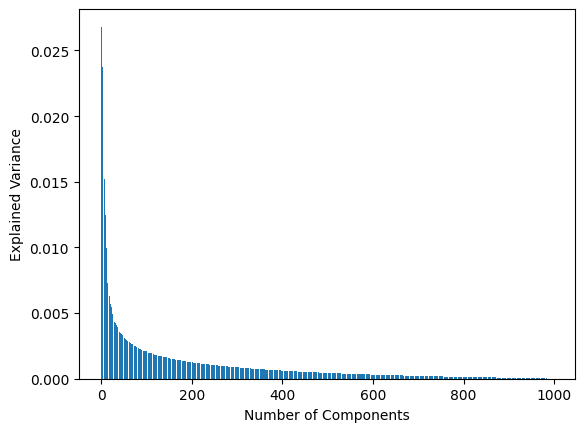

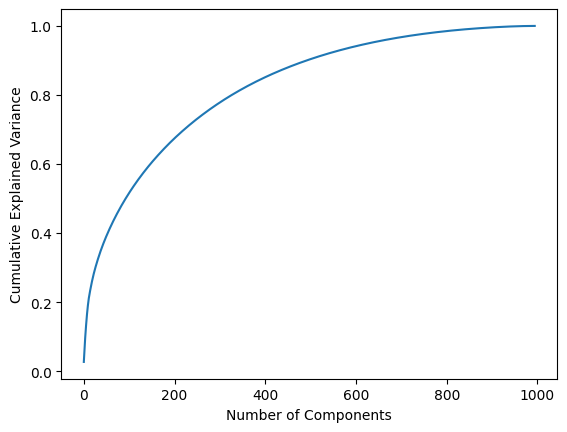

In [102]:

#Fit PCA without specifying the number of components to compute variance ratios for all components
pca = PCA().fit(one_hot_matrix_flattened)

#Plot the explained variance ratio for each principal component
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

#Plot the cumulative explained variance as a function of the number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))  # Cumulative sum of explained variance
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

* We can see here that with 1000 components, we have ~ 90% of the variability of the data that is explained

In [103]:
pca_5_components = PCA(n_components=5).fit_transform(one_hot_matrix_flattened)
pca_5_components.shape

(995, 5)

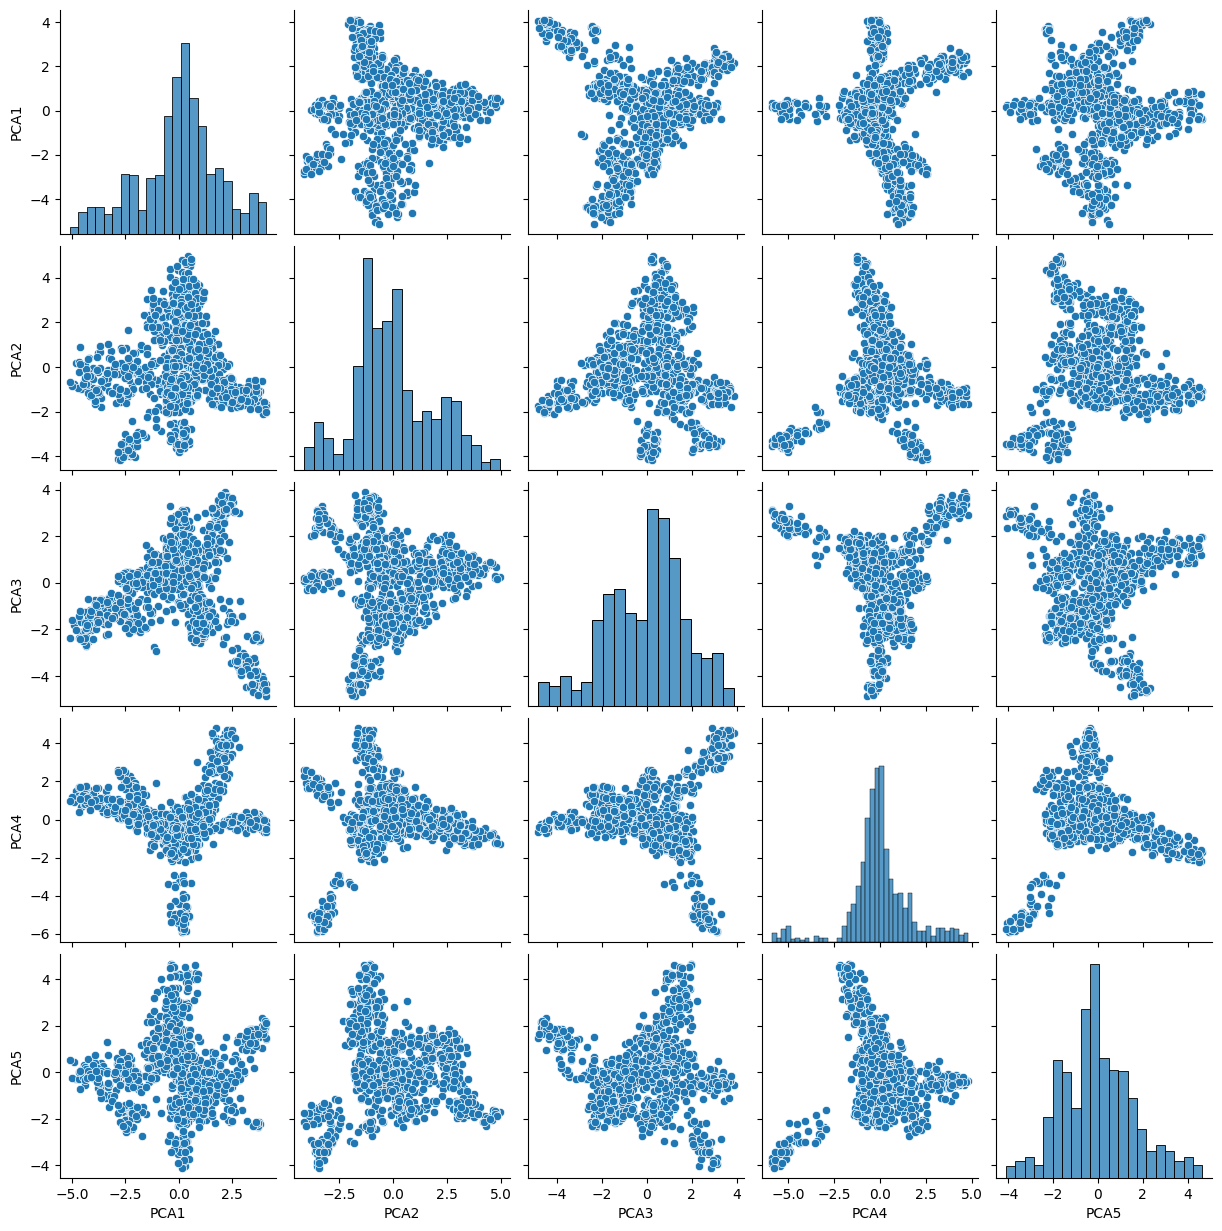

In [104]:
# Create a Data Frame with the 5 first principle components
components = pd.DataFrame(pca_5_components, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5'])
compos = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5']

# Plot the pair components plot using seaborn
pair_plot = sns.pairplot(components, diag_kind="hist")
plt.show()

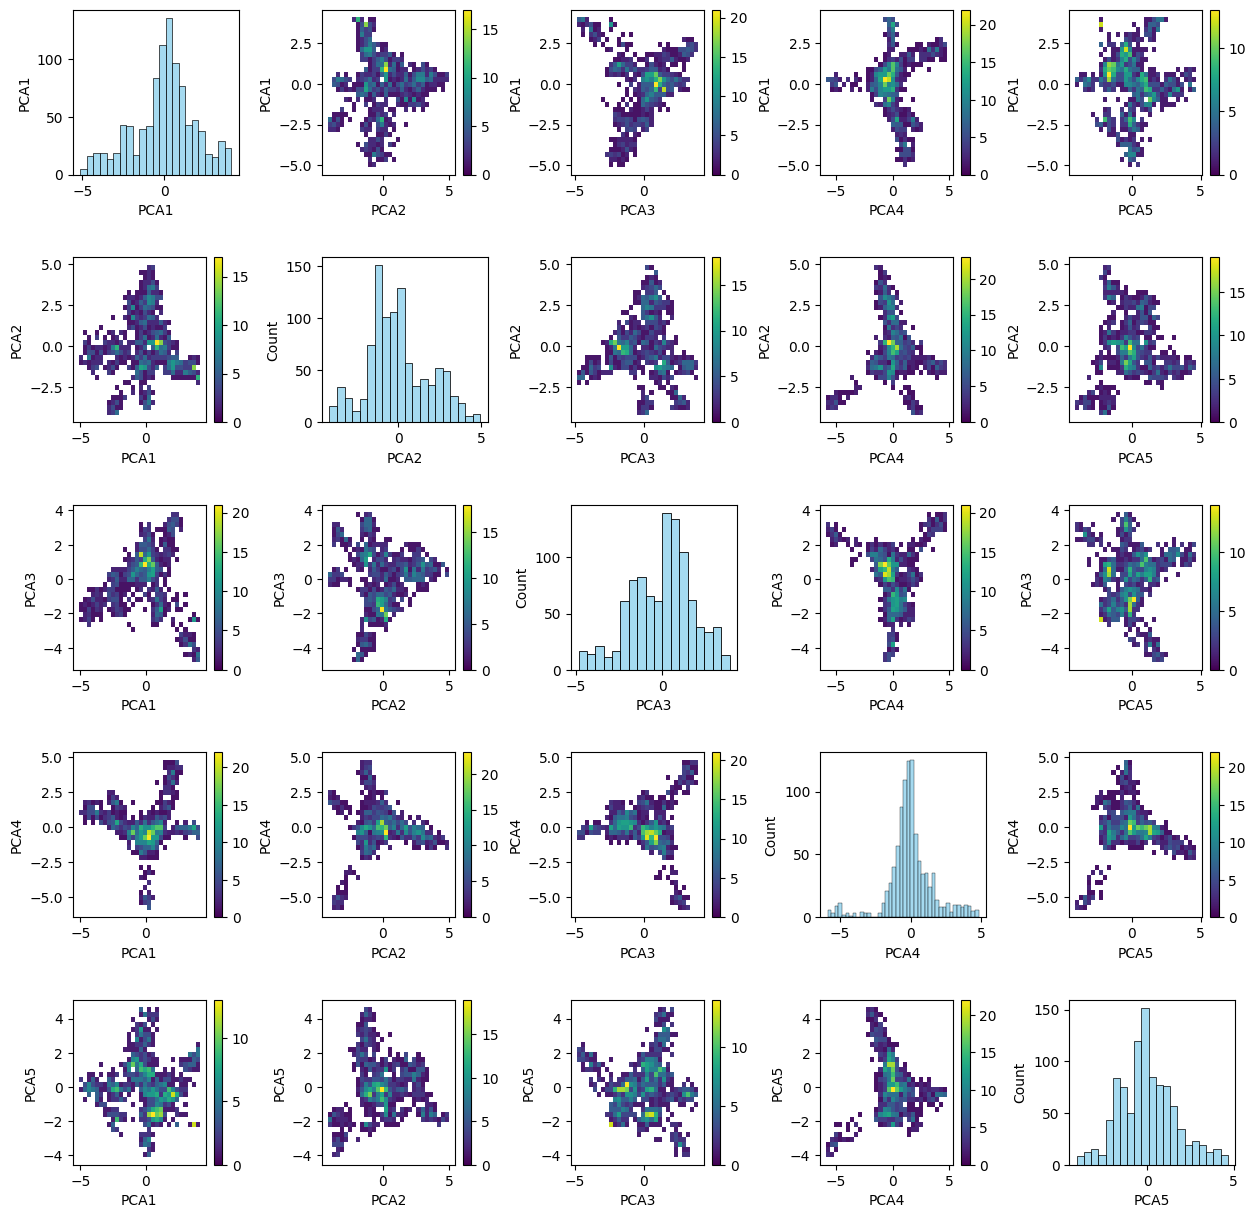

In [105]:
# Créer un pair plot avec des heatmaps
# Créer un pair plot avec des histogrammes 2D et 1D
def hist2d_pairplot(df):
    # Créer une grille de sous-graphiques
    fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    # Parcourir chaque paire de composantes principales
    for i in range(5):
        for j in range(5):
            ax = axes[i, j]
            if i == j:
                # Diagonale : histogramme 1D
                sns.histplot(df.iloc[:, i], ax=ax, kde=False, color='skyblue')
            else:
                # Hors diagonale : histogramme 2D
                sns.histplot(x=df.iloc[:, j], y=df.iloc[:, i], ax=ax, bins=30, cmap='viridis', cbar=True)

            # Ajouter des labels
            if i == 4:
                ax.set_xlabel(df.columns[j])
            if j == 0:
                ax.set_ylabel(df.columns[i])

    plt.show()

# Tracer le pair plot avec des histogrammes 2D et 1D
hist2d_pairplot(components)

### T-SNE

Shape of the t-SNE transformed data:  (993, 2)


Text(0.5, 1.0, 'Scatter plot of the t-SNE transformed data')

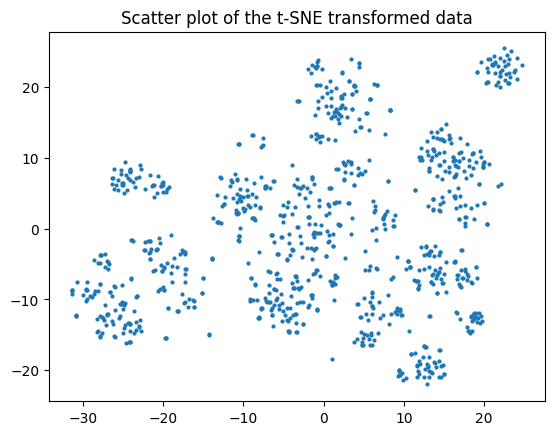

In [13]:
from sklearn.manifold import TSNE

# Initialize t-SNE to reduce the dimensionality to 2 components with a specified perplexity
tsne = TSNE(n_components=2, perplexity=90)

# Apply t-SNE to the data
X_embedded = tsne.fit_transform(one_hot_matrix_flattened)

# Print the shape of the t-SNE transformed data
print("Shape of the t-SNE transformed data: ", X_embedded.shape)

# Create a scatter plot of the t-SNE transformed data
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=4)
plt.title("Scatter plot of the t-SNE transformed data")

## Clustering

Kmeans
Try to find the optimal number of clusters
Plot the clusters on PCA 1 and 2 to see if we get the same results as PCA

Do the gaussian

We can try other things such as MMseq

### K-means

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia = []
silhouette_scores = []
k_values = range(2, 40, 2)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(one_hot_matrix_flattened)
    inertia.append(kmeans.inertia_)  # Somme des distances intra-clusters
    silhouette_scores.append(silhouette_score(one_hot_matrix_flattened, kmeans.labels_))

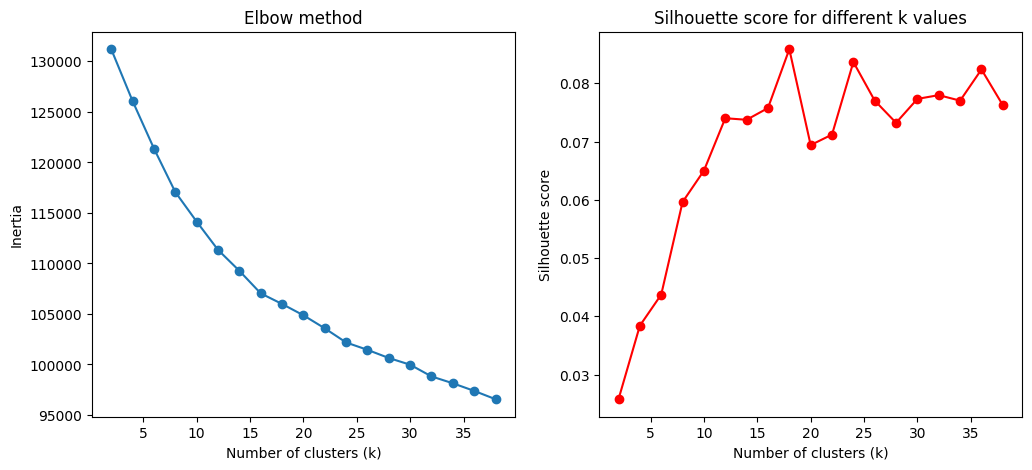

In [109]:
# Tracer la courbe du coude
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow method")

# Tracer le score de silhouette
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='red')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.title("Silhouette score for different k values")

plt.show()

#### Elbow Curve

- **Goal**: Identify the optimal number of clusters by observing where the decrease in inertia slows down.  
Definition:Inertia is the sum of the squared distances between each point and the centroid of its cluster. In other words, it is a measure of the dispersion of points within the clusters.
- **Observation**: The curve shows a rapid decrease in inertia up to around \( k = 6 \) or \( k = 7 \), after which the decrease slows down. This suggests that 6 or 7 clusters might be a good choice.

Text(0.5, 1.0, 'Elbow curve')

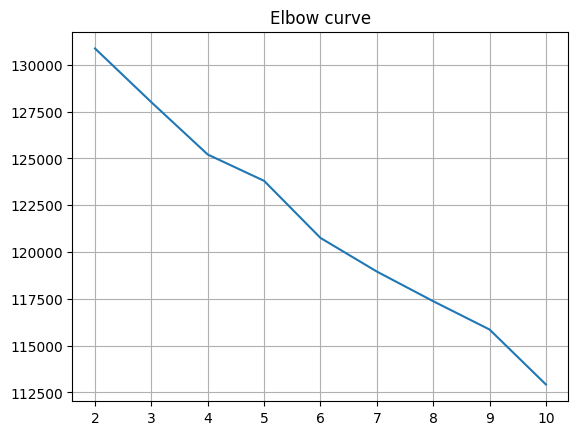

In [ ]:
plt.plot(Ks, elbow)
plt.grid(True)
plt.title('Elbow curve')

#### Silhouette Score

- **Goal**: Evaluate the quality of clustering by measuring how well the points are grouped within their respective clusters.
It measures how similar each data point is to other points in its own cluster compared to points in neighboring clusters.

   - **High Score (close to 1)**: The clusters are well-defined and distinct from each other.
   - **Low Score (close to 0 or negative)**: The clusters overlap or the points are not well assigned.

- **Observation**: The silhouette score increases up to \( k = 6 \), indicating an improvement in clustering quality. After \( k = 6 \), the score begins to stabilize and shows a slight decrease, suggesting that adding more clusters does not significantly improve clustering quality.

Text(0.5, 1.0, 'Silhouette score curve')

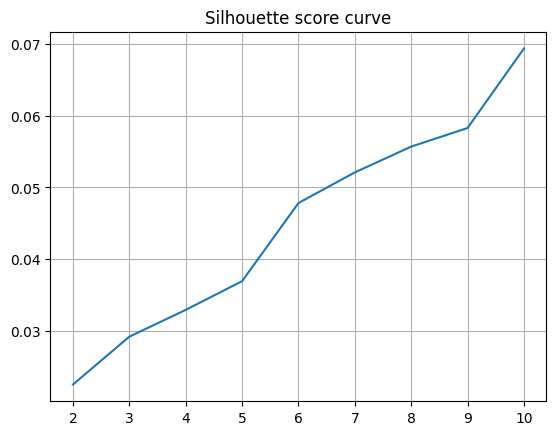

In [ ]:
plt.plot(Ks, silhouette)
plt.grid(True)
plt.title('Silhouette score curve')

**Conclusion:**

- **Optimal Number of Clusters**: Both methods suggest that the optimal number of clusters for our data is likely around \( k = 6 \). This is supported by the elbow curve, which shows a slowdown in the decrease of inertia, and by the silhouette score curve, which shows a peak at \( k = 6 \).

- **Clustering Quality**: The silhouette score around 0.05 to 0.06 indicates that the clusters are reasonably well-defined, but there is still room for improvement.

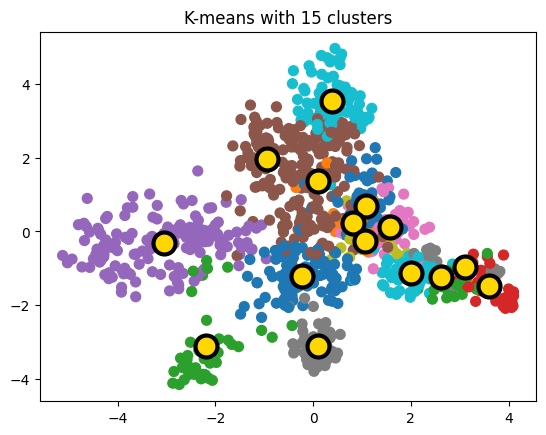

In [110]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k = 15
kmeans = KMeans(k)

# Fit the model to the data
kmeans.fit(one_hot_matrix_flattened)

# Predict the cluster labels for the data points
y_kmeans = kmeans.predict(one_hot_matrix_flattened)
#


# Plot the clustered data points with color coding for clusters
plt.scatter(components["PCA1"], components["PCA2"], c=y_kmeans, s=50, cmap="tab10", linewidth=1)

# Mark the cluster centers with larger, gold-colored points
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], s=250, color="gold", edgecolor='black', linewidth=3)
plt.title(f"K-means with {k} clusters")
plt.show()

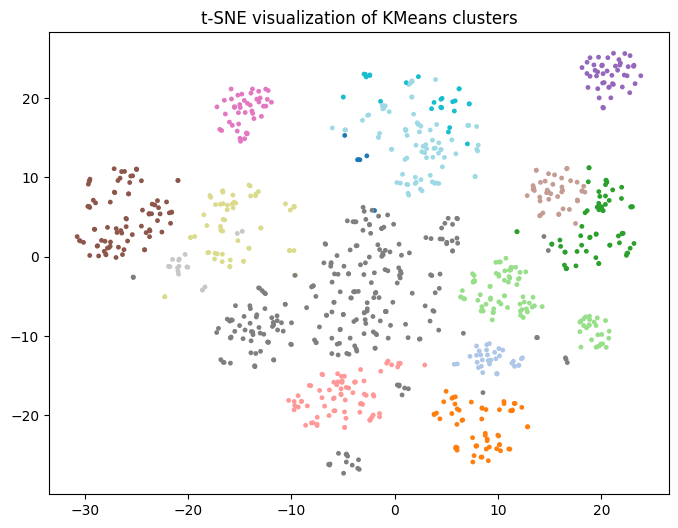

In [116]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Réduction de dimension avec t-SNE
tsne = TSNE(n_components=2, perplexity=90)
X_embedded = tsne.fit_transform(one_hot_matrix_flattened)

# Clustering avec KMeans
k = 15
kmeans = KMeans(n_clusters=k, random_state=42)
y_kmeans = kmeans.fit_predict(one_hot_matrix_flattened)

# Visualisation des clusters sur le scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_kmeans, cmap='tab20', s=6)
plt.title("t-SNE visualization of KMeans clusters")
plt.show()


### Gaussian Mixture Model

In [ ]:
# moving data and model to GPU
import torch
if torch.cuda.is_available():
  dev = "cuda:0"
else:
  dev = "cpu"
print(dev)
device = torch.device(dev)

cuda:0


#### Choose the optimal number of components:

- The lower is the BIC, the better is the model to actually predict the data we have, and by extension, the true, unknown, distribution. In order to avoid overfitting, this technique penalizes models with big number of clusters.



In [15]:
from sklearn.mixture import GaussianMixture
from sklearn.exceptions import ConvergenceWarning
import warnings

# ⚠️ Ignore les avertissements de convergence
warnings.filterwarnings("ignore", category=ConvergenceWarning)


# Liste des nombres de composantes à tester
n_components_range = range(2, 40, 2)

# Stocker les valeurs du BIC
bic_values = []
aic_values = []
# Tester chaque valeur de k (nombre de composantes)
for k in n_components_range:
  gmm = GaussianMixture(n_components=k)
  gmm.fit((one_hot_matrix_flattened))
  bic_values.append(gmm.bic(one_hot_matrix_flattened))
  aic_values.append(gmm.aic(one_hot_matrix_flattened))
  print(k)


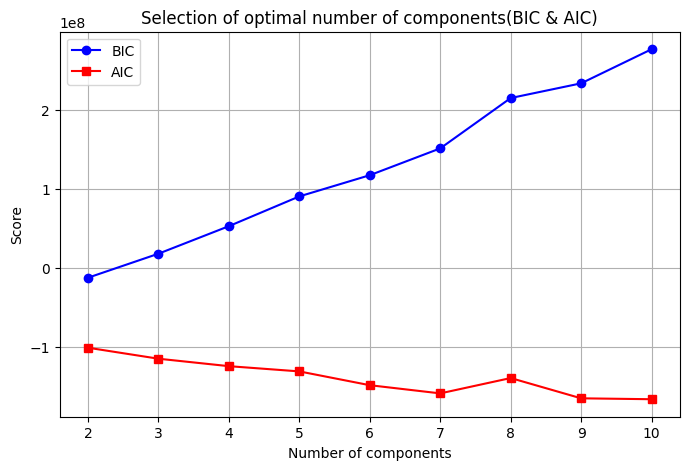

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(n_components_range, bic_values, marker='o', linestyle='-', color='b', label="BIC")
plt.plot(n_components_range, aic_values, marker='s', linestyle='-', color='r', label="AIC")
plt.xlabel("Number of components")
plt.ylabel("Score")
plt.title("Selection of optimal number of components(BIC & AIC)")
plt.legend()
plt.grid()
plt.show()

#### Visualize the GMM clustering on the 2 first principal components

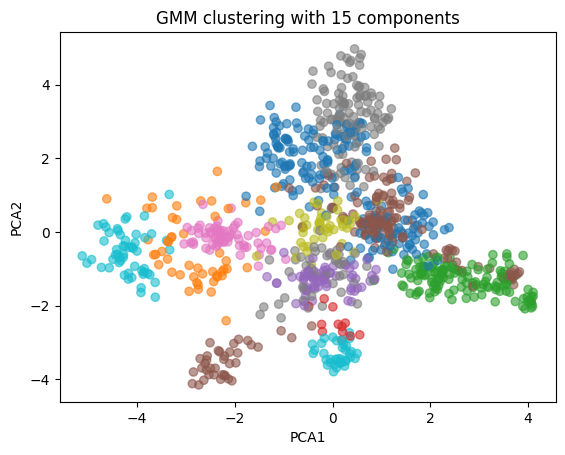

In [118]:
# Visualizing the clustering
n_compos = [15]
for n in n_compos:
  plt.scatter(components['PCA1'], components['PCA2'],
            c = GaussianMixture(n_components = n).fit_predict(components),  cmap = "tab10", alpha = 0.6)
  plt.xlabel('PCA1')
  plt.ylabel('PCA2')
  plt.title(f'GMM clustering with {n} components')
  plt.show()

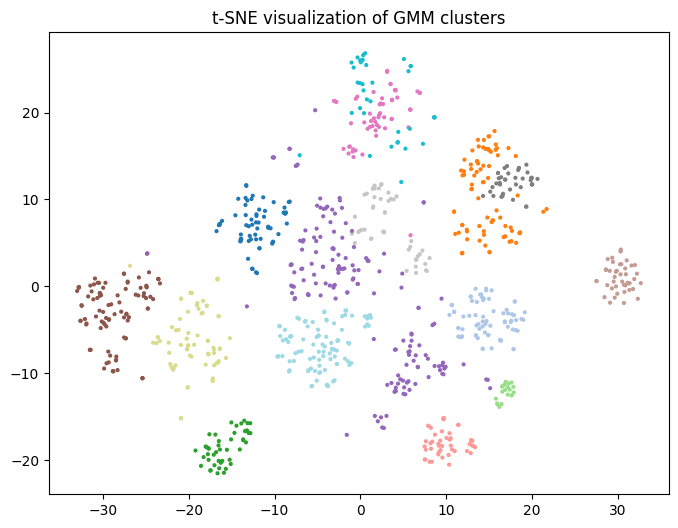

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE

# Réduction de dimension avec t-SNE
tsne = TSNE(n_components=2, perplexity=90, random_state=42)
X_embedded = tsne.fit_transform(one_hot_matrix_flattened)

# Clustering avec Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=15, random_state=42)
y_gmm = gmm.fit_predict(one_hot_matrix_flattened)

# Visualisation des clusters sur le scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_gmm, cmap='tab20', s=4)
plt.title("t-SNE visualization of GMM clusters")
plt.show()
